<a href="https://colab.research.google.com/github/chaiminwoo0223/Data-Analysis/blob/main/ex7_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 이상치 만들기
import pandas as pd
import numpy as np
df = pd.DataFrame({'sex'  : [1,2,1,3,2,1],
                   'score': [5,4,3,4,2,6]})
df

,sex,score
0,1,5
1,2,4
2,1,3
3,3,4
4,2,2
5,1,6


In [2]:
df['sex'].value_counts().sort_index() # 이상치 확인

1    3
2    2
3    1
Name: sex, dtype: int64

In [3]:
df['score'].value_counts().sort_index() # 이상치 확인

2    1
3    1
4    2
5    1
6    1
Name: score, dtype: int64

In [4]:
# sex가 3이면 NaN 부여
df['sex'] = np.where(df['sex'] == 3,np.nan,df['sex'])
df

,sex,score
0,1.0,5
1,2.0,4
2,1.0,3
3,NaN,4
4,2.0,2
5,1.0,6


In [5]:
# score가 5보다 크면 NaN 부여
df['score'] = np.where(df['score'] > 5,np.nan,df['score'])
df

,sex,score
0,1.0,5.0
1,2.0,4.0
2,1.0,3.0
3,NaN,4.0
4,2.0,2.0
5,1.0,NaN


In [6]:
# 결측치 제거하고 분석하기
df.dropna(subset = ['sex','score'])\
  .groupby('sex')\
  .agg(mean_score = ('score','mean'))

,mean_score
sex,
1.0,4.0
2.0,3.0


In [7]:
df = pd.DataFrame({'x1': [1,1,2,2]})
df['x2'] = np.where(df['x1'] == 1,'a',np.nan) # 조건에 맞으면 문자 부여

In [8]:
df

,x1,x2
0,1,a
1,1,a
2,2,nan
3,2,nan


In [9]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,False
3,False,False


In [10]:
df['x2'] = np.where(df['x1'] == 1,'a','etc') # 결측치로 만들 값에 문자 부여
df['x2'] = df['x2'].replace('etc',np.nan) # etc를 NaN으로 바꾸기

In [11]:
df

,x1,x2
0,1,a
1,1,a
2,2,NaN
3,2,NaN


In [12]:
df.isna()

,x1,x2
0,False,False
1,False,False
2,False,True
3,False,True


In [13]:
mpg = pd.read_csv('/content/drive/MyDrive/수업/데이터 분석 입문/강의자료/Data/mpg.csv')
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
229,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
230,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
231,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
232,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


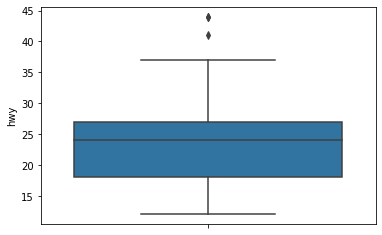

In [14]:
# 상자 그림 그리기
import seaborn as sns
sns.boxplot(data = mpg, y = 'hwy')

In [15]:
# 1사분위수: 하위 25%
pct25 = mpg['hwy'].quantile(.25)
pct25

18.0

In [16]:
# 3사분위수: 하위 75%
pct75 = mpg['hwy'].quantile(.75)
pct75

27.0

In [17]:
# IQR: 1사분위수와 3사분위수의 거리
iqr = pct75 - pct25
iqr

9.0

In [18]:
# 하한: 1사분위수보다 'IQR의 1.5배'만큼 더 작은 값
pct25 - 1.5 * iqr

4.5

In [19]:
# 상한: 3사분위수보다 'IQR의 1.5배'만큼 더 큰 값
pct75 + 1.5 * iqr

40.5

In [20]:
mpg['hwy'] = np.where((mpg['hwy'] < 4.5) | (mpg['hwy'] > 40.5),np.nan,mpg['hwy']) # 4.5 ~ 40.5 벗어나면 NaN 부여
mpg['hwy'].isna().sum() # 결측치 빈도 확인

3

In [21]:
# 결측치 제거하고 분석하기
mpg.dropna(subset = ['hwy'])\
   .groupby('drv')\
   .agg(mean_hwy = ('hwy','mean'))

,mean_hwy
drv,
4,19.174757
f,27.728155
r,21.000000


In [22]:
# 실습

In [23]:
mpg.loc[[9,13,57,92],'drv'] = 'k' # drv 이상치 할당

In [24]:
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42] # cty 이상치 할당

In [25]:
# 문제1

In [26]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
k      4
r     24
Name: drv, dtype: int64

In [27]:
drv_list = ['4','f','r']
mpg['drv'] = np.where(mpg['drv'].isin(drv_list),mpg['drv'],np.nan)

In [28]:
mpg['drv'].value_counts().sort_index()

4    100
f    106
r     24
Name: drv, dtype: int64

In [29]:
# 문제2

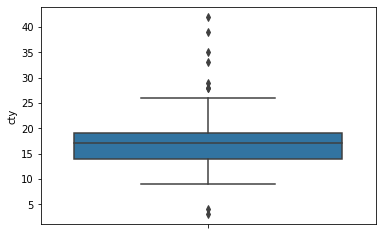

In [30]:
sns.boxplot(data = mpg, y = 'cty')

In [31]:
pct25 = mpg['cty'].quantile(.25)
pct25

14.0

In [32]:
pct75 = mpg['cty'].quantile(.75)
pct75

19.0

In [33]:
iqr = pct75 - pct25
iqr

5.0

In [34]:
pct25 - 1.5 * iqr

6.5

In [35]:
pct75 + 1.5 * iqr

26.5

In [36]:
mpg['cty'] = np.where((mpg['cty'] < 6.5) | (mpg['cty'] > 26.5),np.nan,mpg['cty'])

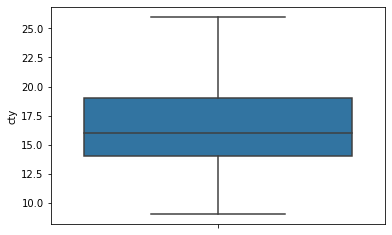

In [37]:
sns.boxplot(data = mpg, y = 'cty')

In [38]:
# 문제3

In [39]:
mpg.dropna(subset = ['drv','cty'])\
   .groupby('drv')\
   .agg(mean_cty = ('cty','mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
